# **Project**- Predictive Analysis and Customer Segmentation for an E-Commerce Platform

In [1]:
#Importing relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Business Understanding and Data Collection 

In [2]:
data = pd.read_csv('data.csv', encoding = 'ISO-8859-1')

In [3]:
data.shape

(541909, 8)

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


## 2. Data Cleaning and Preprocessing

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format ='%m/%d/%Y %H:%M')

In [10]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
data1 = data.dropna()

In [12]:
data1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [14]:
data1['CustomerID'] = data1['CustomerID'].astype('int64')

In [15]:
data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [16]:
data1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
data1 = data1[data1.Quantity >= 0]
data1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [18]:
#Calulating total bill amount
data1['Total_Amount'] = data1['UnitPrice'] * data1['Quantity']
data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397924 non-null  object        
 1   StockCode     397924 non-null  object        
 2   Description   397924 non-null  object        
 3   Quantity      397924 non-null  int64         
 4   InvoiceDate   397924 non-null  datetime64[ns]
 5   UnitPrice     397924 non-null  float64       
 6   CustomerID    397924 non-null  int64         
 7   Country       397924 non-null  object        
 8   Total_Amount  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB


In [20]:
data1 = data1.iloc[:,[6,0,4,3,5,8,2,1,7]]

In [21]:
data1.insert(loc=3, column='Year', value=data1.InvoiceDate.dt.year)

In [22]:
data1.head()

,CustomerID,InvoiceNo,InvoiceDate,Year,Quantity,UnitPrice,Total_Amount,Description,StockCode,Country
0,17850,536365,2010-12-01 08:26:00,2010,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,85123A,United Kingdom
1,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,WHITE METAL LANTERN,71053,United Kingdom
2,17850,536365,2010-12-01 08:26:00,2010,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,84406B,United Kingdom
3,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,84029G,United Kingdom
4,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,84029E,United Kingdom


## 3. Exploratory Data Analysis

In [23]:
data1['CustomerID'].unique()

array([17850, 13047, 12583, ..., 13298, 14569, 12713], dtype=int64)

In [24]:
purchase = data1.groupby(by=['CustomerID','Country'], as_index=False)['Total_Amount'].sum()
purchase

,CustomerID,Country,Total_Amount
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40
...,...,...,...
4342,18280,United Kingdom,180.60
4343,18281,United Kingdom,80.82
4344,18282,United Kingdom,178.05
4345,18283,United Kingdom,2094.88


Text(0.5, 1.0, 'Total Purchase made by Different Customers')

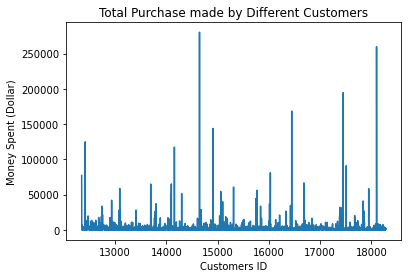

In [25]:
plt.plot(purchase['CustomerID'],purchase['Total_Amount'])
plt.xlabel('Customers ID')
plt.ylabel('Money Spent (Dollar)')
plt.title('Total Purchase made by Different Customers')

In [26]:
purchase.sort_values(by='Total_Amount', ascending=False).head()

,CustomerID,Country,Total_Amount
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


In [27]:
orders = data1.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
orders.head()

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


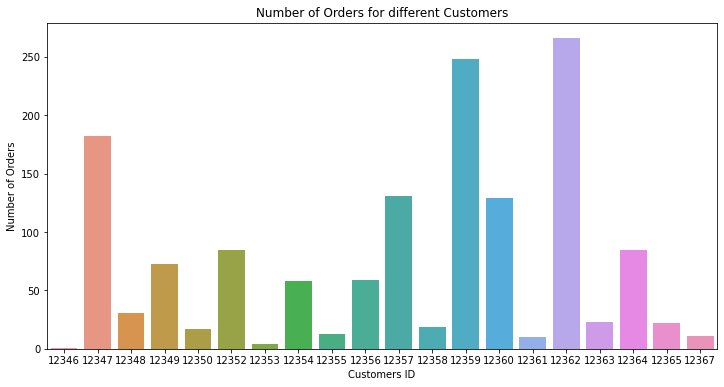

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(orders['CustomerID'].head(20),orders['InvoiceNo'].head(20))
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [29]:
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


Text(0.5, 1.0, 'Number of Orders per Year')

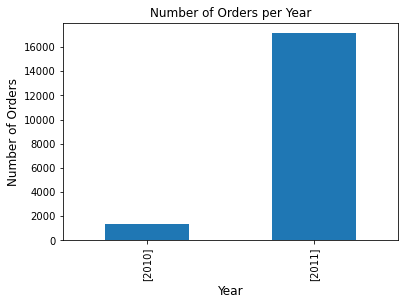

In [30]:
opy = data1.groupby(by=['InvoiceNo','Year'])['Year'].unique().value_counts().sort_index().plot(kind='bar')
opy.set_xlabel('Year',fontsize=12)
opy.set_ylabel('Number of Orders',fontsize=12)
opy.set_title('Number of Orders per Year')

In [31]:
data1.head()

,CustomerID,InvoiceNo,InvoiceDate,Year,Quantity,UnitPrice,Total_Amount,Description,StockCode,Country
0,17850,536365,2010-12-01 08:26:00,2010,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,85123A,United Kingdom
1,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,WHITE METAL LANTERN,71053,United Kingdom
2,17850,536365,2010-12-01 08:26:00,2010,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,84406B,United Kingdom
3,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,84029G,United Kingdom
4,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,84029E,United Kingdom


In [32]:
data1['Country1'] = data1['Country']

In [33]:
opc = data1.groupby(by=['Country1'], as_index=False)['Country'].count().sort_index()
opc.head()

,Country1,Country
0,Australia,1185
1,Austria,398
2,Bahrain,17
3,Belgium,2031
4,Brazil,32


In [34]:
opc = opc.sort_values(by='Country', ascending=False)
opc.head()

,Country1,Country
35,United Kingdom,354345
14,Germany,9042
13,France,8342
10,EIRE,7238
30,Spain,2485


Text(0, 0.5, 'Total Orders')

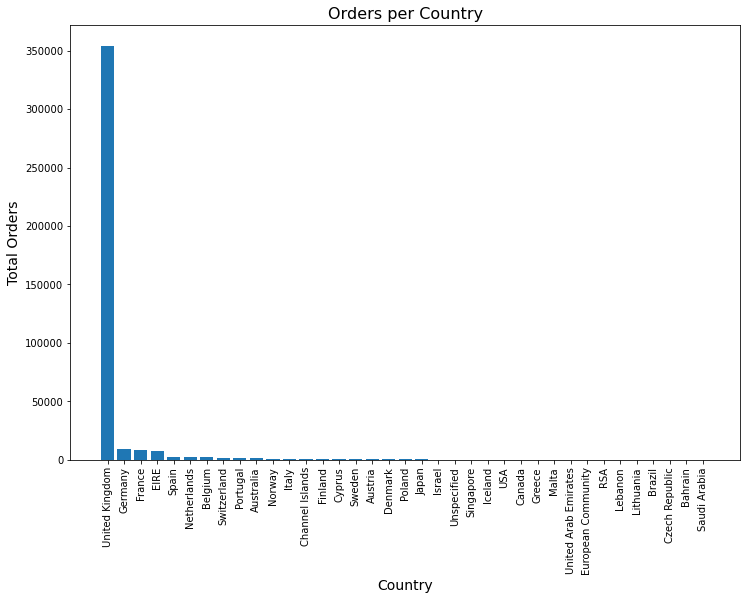

In [35]:
plt.figure(figsize=(12,8))
plt.bar(opc['Country1'],opc['Country'])
plt.xticks(rotation='vertical')
plt.title("Orders per Country",fontsize=16)
plt.xlabel("Country",fontsize=14)
plt.ylabel("Total Orders",fontsize=14)

Text(0.5, 1.0, 'Orders per Country')

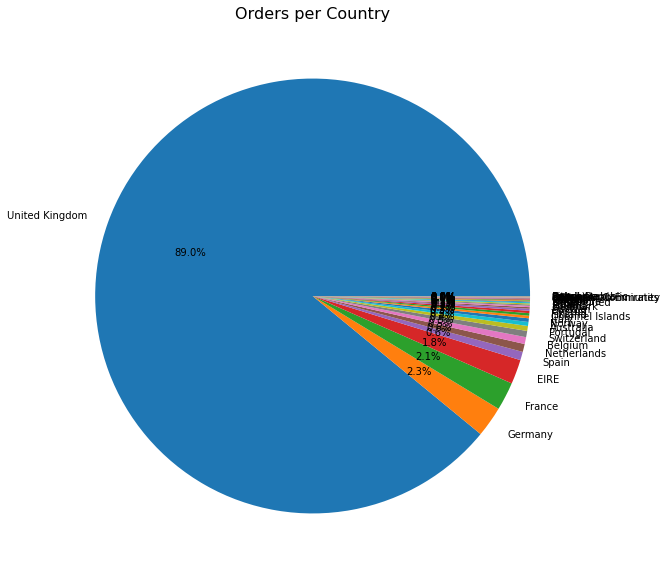

In [36]:
plt.figure(figsize=(10,10))
plt.pie(opc['Country'],autopct='%1.1f%%', labels=opc['Country1'].unique())
plt.title("Orders per Country",fontsize=16)

In [37]:
apc = data1.groupby(by=['Country'], as_index=False)['Total_Amount'].sum()
apc = apc.sort_values(by='Total_Amount', ascending=False)
apc.head()

,Country,Total_Amount
35,United Kingdom,7308391.554
23,Netherlands,285446.340
10,EIRE,265545.900
14,Germany,228867.140
13,France,209024.050


Text(0, 0.5, 'Total Amount')

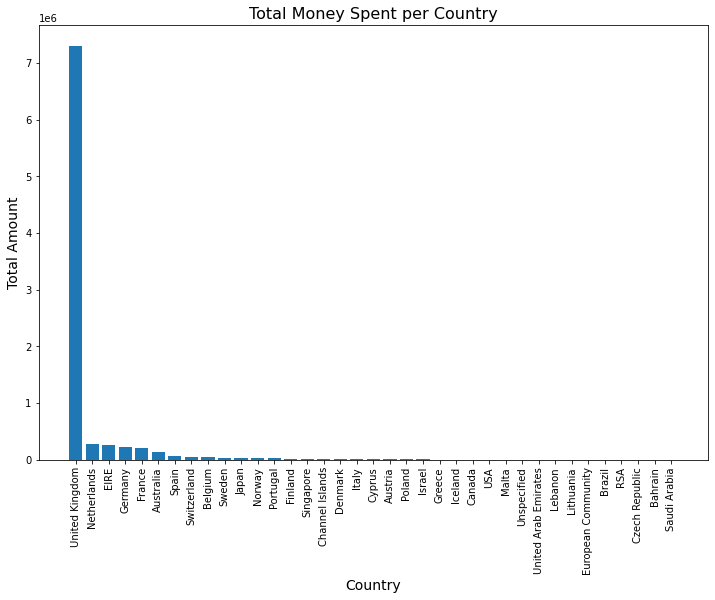

In [38]:
plt.figure(figsize=(12,8))
plt.bar(apc.Country,apc.Total_Amount)
plt.xticks(rotation='vertical')
plt.title("Total Money Spent per Country", fontsize=16)
plt.xlabel("Country",fontsize=14)
plt.ylabel("Total Amount", fontsize=14)

In [39]:
data1.corr()

,CustomerID,Year,Quantity,UnitPrice,Total_Amount
CustomerID,1.000000,-0.036352,-0.006411,-0.010863,-0.004104
Year,-0.036352,1.000000,0.001595,-0.000191,0.000431
Quantity,-0.006411,0.001595,1.000000,-0.004561,0.908812
UnitPrice,-0.010863,-0.000191,-0.004561,1.000000,0.081646
Total_Amount,-0.004104,0.000431,0.908812,0.081646,1.000000


<AxesSubplot:>

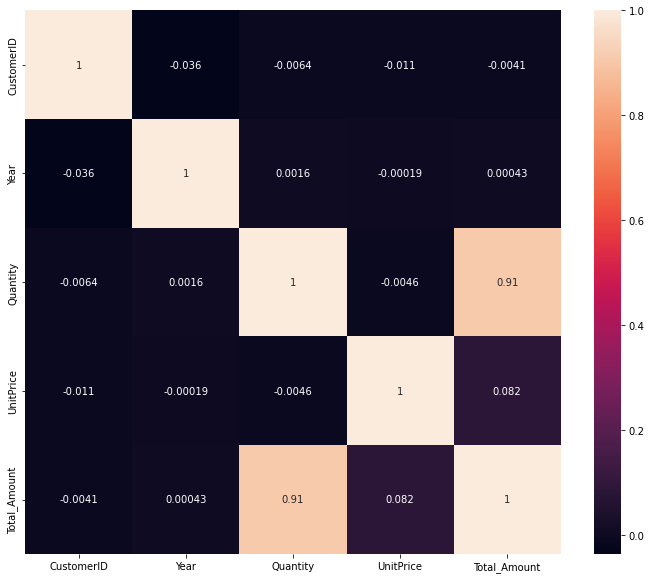

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(data1.corr(), annot=True)

<AxesSubplot:xlabel='Country', ylabel='Count'>

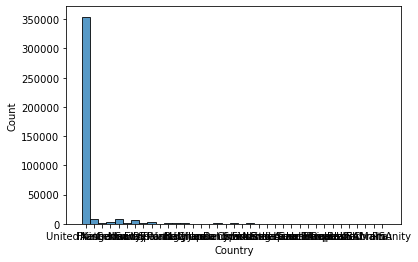

In [41]:
sns.histplot(data=data1['Country'])

<AxesSubplot:xlabel='CustomerID', ylabel='Count'>

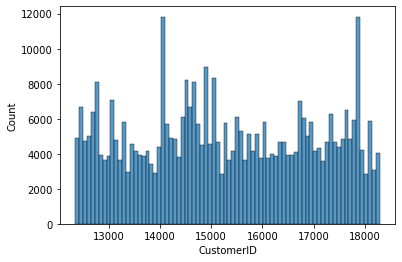

In [42]:
sns.histplot(data=data1['CustomerID'])

{'whiskers': [<matplotlib.lines.Line2D at 0x236d4710910>,
 'caps': [<matplotlib.lines.Line2D at 0x236d471e070>,
 'boxes': [<matplotlib.lines.Line2D at 0x236d4710580>],
 'medians': [<matplotlib.lines.Line2D at 0x236d471e790>],
 'fliers': [<matplotlib.lines.Line2D at 0x236d471eb20>],
 'means': []}

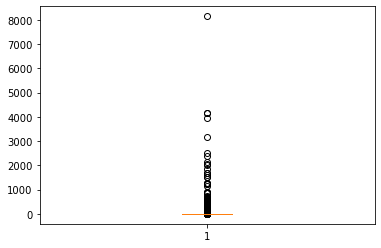

In [43]:
plt.boxplot(data1['UnitPrice'])

In [44]:
free_units = data1[data1.UnitPrice == 0]
free_units

,CustomerID,InvoiceNo,InvoiceDate,Year,Quantity,UnitPrice,Total_Amount,Description,StockCode,Country,Country1
9302,12647,537197,2010-12-05 14:02:00,2010,1,0.0,0.0,ROUND CAKE TIN VINTAGE GREEN,22841,Germany,Germany
33576,16560,539263,2010-12-16 14:36:00,2010,4,0.0,0.0,ADVENT CALENDAR GINGHAM SACK,22580,United Kingdom,United Kingdom
40089,14911,539722,2010-12-21 13:45:00,2010,10,0.0,0.0,REGENCY CAKESTAND 3 TIER,22423,EIRE,EIRE
47068,13081,540372,2011-01-06 16:41:00,2011,24,0.0,0.0,PAPER BUNTING RETROSPOT,22090,United Kingdom,United Kingdom
47070,13081,540372,2011-01-06 16:41:00,2011,24,0.0,0.0,PLASTERS IN TIN SKULLS,22553,United Kingdom,United Kingdom
56674,15107,541109,2011-01-13 15:10:00,2011,1,0.0,0.0,ORGANISER WOOD ANTIQUE WHITE,22168,United Kingdom,United Kingdom
86789,17560,543599,2011-02-10 13:08:00,2011,16,0.0,0.0,FAIRY CAKES NOTEBOOK A6 SIZE,84535B,United Kingdom,United Kingdom
130188,13239,547417,2011-03-23 10:25:00,2011,36,0.0,0.0,CERAMIC BOWL WITH LOVE HEART DESIGN,22062,United Kingdom,United Kingdom
139453,13113,548318,2011-03-30 12:45:00,2011,5,0.0,0.0,MINI CAKE STAND HANGING STRAWBERY,22055,United Kingdom,United Kingdom
145208,14410,548871,2011-04-04 14:42:00,2011,2,0.0,0.0,HEART GARLAND RUSTIC PADDED,22162,United Kingdom,United Kingdom


In [45]:
free_units.insert(loc=4, column='Month', value=data1.InvoiceDate.dt.month)
free_units.head()

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,Quantity,UnitPrice,Total_Amount,Description,StockCode,Country,Country1
9302,12647,537197,2010-12-05 14:02:00,2010,12,1,0.0,0.0,ROUND CAKE TIN VINTAGE GREEN,22841,Germany,Germany
33576,16560,539263,2010-12-16 14:36:00,2010,12,4,0.0,0.0,ADVENT CALENDAR GINGHAM SACK,22580,United Kingdom,United Kingdom
40089,14911,539722,2010-12-21 13:45:00,2010,12,10,0.0,0.0,REGENCY CAKESTAND 3 TIER,22423,EIRE,EIRE
47068,13081,540372,2011-01-06 16:41:00,2011,1,24,0.0,0.0,PAPER BUNTING RETROSPOT,22090,United Kingdom,United Kingdom
47070,13081,540372,2011-01-06 16:41:00,2011,1,24,0.0,0.0,PLASTERS IN TIN SKULLS,22553,United Kingdom,United Kingdom


Text(0.5, 1.0, 'Monthly Free Units')

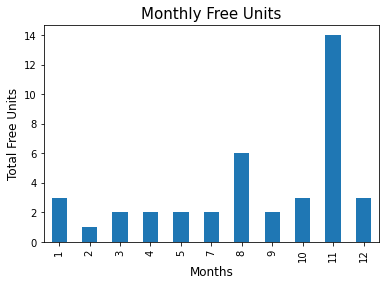

In [46]:
#Monthly free units plotting
mfu = free_units.Month.value_counts().sort_index().plot(kind='bar')
mfu.set_xlabel('Months', fontsize=12)
mfu.set_ylabel('Total Free Units', fontsize=12)
mfu.set_title('Monthly Free Units', fontsize=15)

In [47]:
data1.head()

,CustomerID,InvoiceNo,InvoiceDate,Year,Quantity,UnitPrice,Total_Amount,Description,StockCode,Country,Country1
0,17850,536365,2010-12-01 08:26:00,2010,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,85123A,United Kingdom,United Kingdom
1,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,WHITE METAL LANTERN,71053,United Kingdom,United Kingdom
2,17850,536365,2010-12-01 08:26:00,2010,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,84406B,United Kingdom,United Kingdom
3,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,84029G,United Kingdom,United Kingdom
4,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,84029E,United Kingdom,United Kingdom


Text(0.5, 0, 'Quantity')

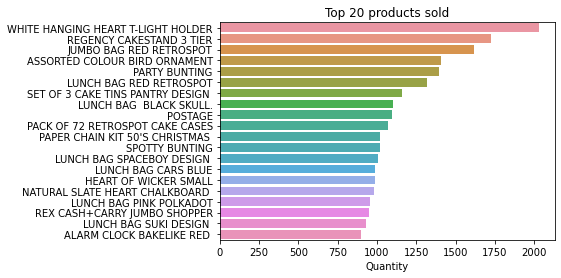

In [48]:
sns.barplot(x = data1.Description.value_counts().head(20), y = data1.Description.value_counts().head(20).index)
plt.title("Top 20 products sold")
plt.xlabel("Quantity")

## 4. Feature Engineering and Data Transformation

In [49]:
#Creating new features
data1['Month'] = data1['InvoiceDate'].dt.month
data1['Day'] = data1['InvoiceDate'].dt.day
data1['Hour'] = data1['InvoiceDate'].dt.hour
data1.drop(['Country1'],axis=1,inplace=True)

In [50]:
data1.head()

,CustomerID,InvoiceNo,InvoiceDate,Year,Quantity,UnitPrice,Total_Amount,Description,StockCode,Country,Month,Day,Hour
0,17850,536365,2010-12-01 08:26:00,2010,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,85123A,United Kingdom,12,1,8
1,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,WHITE METAL LANTERN,71053,United Kingdom,12,1,8
2,17850,536365,2010-12-01 08:26:00,2010,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,84406B,United Kingdom,12,1,8
3,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,84029G,United Kingdom,12,1,8
4,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,84029E,United Kingdom,12,1,8


In [51]:
data1.describe()

,CustomerID,Year,Quantity,UnitPrice,Total_Amount,Month,Day,Hour
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,15294.315171,2010.934259,13.021823,3.116174,22.394749,7.612537,15.042181,12.728247
std,1713.169877,0.247829,180.420210,22.096788,309.055588,3.416527,8.653771,2.273535
min,12346.000000,2010.000000,1.000000,0.000000,0.000000,1.000000,1.000000,6.000000
25%,13969.000000,2011.000000,2.000000,1.250000,4.680000,5.000000,7.000000,11.000000
50%,15159.000000,2011.000000,6.000000,1.950000,11.800000,8.000000,15.000000,13.000000
75%,16795.000000,2011.000000,12.000000,3.750000,19.800000,11.000000,22.000000,14.000000
max,18287.000000,2011.000000,80995.000000,8142.750000,168469.600000,12.000000,31.000000,20.000000


(array([3.97921e+05, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0.  ,  16846.96,  33693.92,  50540.88,  67387.84,  84234.8 ,
        101081.76, 117928.72, 134775.68, 151622.64, 168469.6 ]),
 <BarContainer object of 10 artists>)

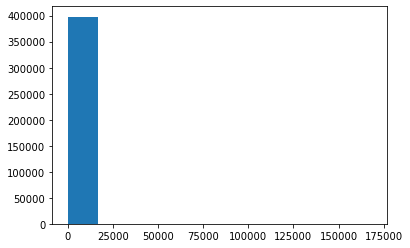

In [52]:
plt.hist(data1.Total_Amount)

In [53]:
#Data Transformation
#Log transformation of Total_amount spending to handle skewed distribution
data1['Log_Annual_Spending'] = np.log1p(data1['Total_Amount'])

In [54]:
data1.describe()

,CustomerID,Year,Quantity,UnitPrice,Total_Amount,Month,Day,Hour,Log_Annual_Spending
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,15294.315171,2010.934259,13.021823,3.116174,22.394749,7.612537,15.042181,12.728247,2.454360
std,1713.169877,0.247829,180.420210,22.096788,309.055588,3.416527,8.653771,2.273535,1.020615
min,12346.000000,2010.000000,1.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000
25%,13969.000000,2011.000000,2.000000,1.250000,4.680000,5.000000,7.000000,11.000000,1.736951
50%,15159.000000,2011.000000,6.000000,1.950000,11.800000,8.000000,15.000000,13.000000,2.549445
75%,16795.000000,2011.000000,12.000000,3.750000,19.800000,11.000000,22.000000,14.000000,3.034953
max,18287.000000,2011.000000,80995.000000,8142.750000,168469.600000,12.000000,31.000000,20.000000,12.034517


(array([4.86080e+04, 1.30598e+05, 1.80728e+05, 2.90540e+04, 7.70800e+03,
        1.03100e+03, 1.87000e+02, 7.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([ 0.        ,  1.20345165,  2.40690331,  3.61035496,  4.81380661,
         6.01725827,  7.22070992,  8.42416157,  9.62761323, 10.83106488,
        12.03451653]),
 <BarContainer object of 10 artists>)

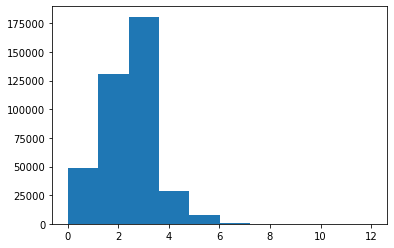

In [55]:
plt.hist(data1['Log_Annual_Spending'])

In [56]:
#Grouping of the data by annual spending of the each customer
annual_spending = data1.groupby('CustomerID')['Total_Amount'].sum()
annual_spending

CustomerID
12346    77183.60
12347     4310.00
12348     1797.24
12349     1757.55
12350      334.40
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     2094.88
18287     1837.28
Name: Total_Amount, Length: 4339, dtype: float64

In [57]:
data1 = data1.merge(annual_spending, on='CustomerID', suffixes=('', '_AnnualSpending'))
data1.head()

,CustomerID,InvoiceNo,InvoiceDate,Year,Quantity,UnitPrice,Total_Amount,Description,StockCode,Country,Month,Day,Hour,Log_Annual_Spending,Total_Amount_AnnualSpending
0,17850,536365,2010-12-01 08:26:00,2010,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,85123A,United Kingdom,12,1,8,2.791165,5391.21
1,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,WHITE METAL LANTERN,71053,United Kingdom,12,1,8,3.060583,5391.21
2,17850,536365,2010-12-01 08:26:00,2010,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,84406B,United Kingdom,12,1,8,3.135494,5391.21
3,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,84029G,United Kingdom,12,1,8,3.060583,5391.21
4,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,84029E,United Kingdom,12,1,8,3.060583,5391.21


In [58]:
data1.drop_duplicates(inplace=True)

In [59]:
data1.shape

(392732, 15)

In [60]:
# Encode categorical variables (Country) using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['Country_Encoded'] = le.fit_transform(data1['Country'])

In [61]:
data1.head()

,CustomerID,InvoiceNo,InvoiceDate,Year,Quantity,UnitPrice,Total_Amount,Description,StockCode,Country,Month,Day,Hour,Log_Annual_Spending,Total_Amount_AnnualSpending,Country_Encoded
0,17850,536365,2010-12-01 08:26:00,2010,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,85123A,United Kingdom,12,1,8,2.791165,5391.21,35
1,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,WHITE METAL LANTERN,71053,United Kingdom,12,1,8,3.060583,5391.21,35
2,17850,536365,2010-12-01 08:26:00,2010,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,84406B,United Kingdom,12,1,8,3.135494,5391.21,35
3,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,84029G,United Kingdom,12,1,8,3.060583,5391.21,35
4,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,84029E,United Kingdom,12,1,8,3.060583,5391.21,35


## 5. Predictive Model Building

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [63]:
x = data1[['Quantity', 'UnitPrice', 'Country_Encoded', 'Year']]
y = data1['Total_Amount']

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(314185, 4)
(78547, 4)
(314185,)
(78547,)


#### Linear Regression Model

In [65]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
y_train_predict_lr = lr.predict(x_train)
y_test_predict_lr = lr.predict(x_test)

#### Decision Tree Regression Model

In [67]:
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [68]:
y_train_predict_dtr = dtr.predict(x_train)
y_test_predict_dtr = dtr.predict(x_test)

#### Random Forest Regressor

rfr = RandomForestRegressor(n_estimators=100,
                            max_depth=7,
                            max_features='auto',
                            min_samples_split=7,
                            min_samples_leaf=3,
                            random_state=40)


In [69]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [70]:
y_train_predict_rfr = rfr.predict(x_train)
y_test_predict_rfr = rfr.predict(x_test)

## 6. Model Evaluation and Customer Segmentation

### • For Linear Regression

In [71]:
print("Linear Regression Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_lr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_lr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_lr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_lr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_lr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_lr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_lr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_lr))

Linear Regression Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 12.45981683843883
Mean Squared Error         : 19343.47093582362
Root Mean Squared Error    : 139.08080721589022
R2 Score                   : 0.8377455564033596

-----------------Testing Performance:-----------------
Mean Absolute Error        : 11.958913345818777
Mean Squared Error         : 3301.4876081782418
Root Mean Squared Error    : 57.45857297373684
R2 Score                   : 0.5280973015236404


### • For Decision Tree Regressor

In [72]:
print("Decision Tree Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_dtr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_dtr))

Decision Tree Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 2.3712255858433097e-13
Mean Squared Error         : 2.80960980276887e-25
Root Mean Squared Error    : 5.300575254412364e-13
R2 Score                   : 1.0

-----------------Testing Performance:-----------------
Mean Absolute Error        : 0.26280469018573394
Mean Squared Error         : 510.42674742510866
Root Mean Squared Error    : 22.59262595240112
R2 Score                   : 0.9270414467442655


### • For Random Forest Regressor

In [73]:
print("Random Forest Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_rfr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_rfr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_rfr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_rfr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_rfr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_rfr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_rfr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_rfr))

Random Forest Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 0.28955260852693004
Mean Squared Error         : 7640.022194281656
Root Mean Squared Error    : 87.40722049282688
R2 Score                   : 0.9359149371737936

-----------------Testing Performance:-----------------
Mean Absolute Error        : 0.25758915668336735
Mean Squared Error         : 485.2947016425758
Root Mean Squared Error    : 22.02940538558805
R2 Score                   : 0.9306337304752812


In [74]:
print("Accuracy on Training set:")
output_train = pd.DataFrame({'Model':['Linear Regressor','Decision Tree Regressor','Random Forest Regressor'], 'Accuracy':[metrics.r2_score(y_train,y_train_predict_lr)*100,metrics.r2_score(y_train,y_train_predict_dtr)*100, metrics.r2_score(y_train,y_train_predict_rfr)*100]})
output_train

Accuracy on Training set:


,Model,Accuracy
0,Linear Regressor,83.774556
1,Decision Tree Regressor,100.000000
2,Random Forest Regressor,93.591494


In [75]:
print("Accuracy on Testing set:")
output_test = pd.DataFrame({'Model':['Linear Regressor','Decision Tree Regressor','Random Forest Regressor'], 'Accuracy':[metrics.r2_score(y_test,y_test_predict_lr)*100, metrics.r2_score(y_test,y_test_predict_dtr)*100, metrics.r2_score(y_test,y_test_predict_rfr)*100]})
output_test

Accuracy on Testing set:


,Model,Accuracy
0,Linear Regressor,52.809730
1,Decision Tree Regressor,92.704145
2,Random Forest Regressor,93.063373


## Customer Segmentation

In [76]:
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [77]:
data1.head()

,CustomerID,InvoiceNo,InvoiceDate,Year,Quantity,UnitPrice,Total_Amount,Description,StockCode,Country,Month,Day,Hour,Log_Annual_Spending,Total_Amount_AnnualSpending,Country_Encoded
0,17850,536365,2010-12-01 08:26:00,2010,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,85123A,United Kingdom,12,1,8,2.791165,5391.21,35
1,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,WHITE METAL LANTERN,71053,United Kingdom,12,1,8,3.060583,5391.21,35
2,17850,536365,2010-12-01 08:26:00,2010,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,84406B,United Kingdom,12,1,8,3.135494,5391.21,35
3,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,84029G,United Kingdom,12,1,8,3.060583,5391.21,35
4,17850,536365,2010-12-01 08:26:00,2010,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,84029E,United Kingdom,12,1,8,3.060583,5391.21,35


In [78]:
new_column_name = {'TotalSpending_AnnualSpending': 'Annual_Spending'}
data1.rename(columns=new_column_name, inplace=True)

In [79]:
# Get the most recent date from the 'InvoiceDate' column
most_recent_date = data1['InvoiceDate'].max()

# Calculate Recency based on the most recent date
rfm_data = data1.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (most_recent_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Total_Amount': 'sum'
})
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total_Amount': 'MonetaryValue'
}, inplace=True)


In [80]:
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40


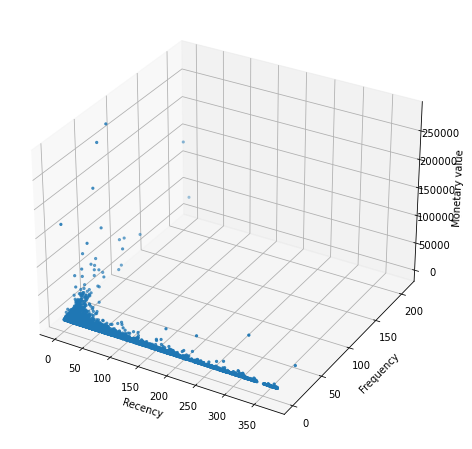

In [81]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=rfm_data.Recency
ys=rfm_data.Frequency
zs=rfm_data.MonetaryValue
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

In [82]:
# Standardize the RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

In [83]:
inertia_values = []
K_range = range(1, 11)  # Trying k values from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)

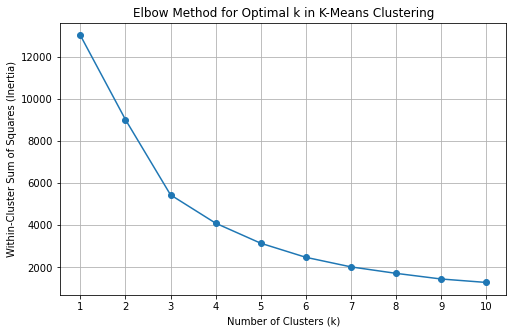

In [84]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k in K-Means Clustering')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [85]:
# Apply K-Means clustering to create clusters based on RFM metrics

kmeans = KMeans(n_clusters=4, random_state= 42)  
rfm_data['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

In [86]:
print("K-Means Clustering:")
print(rfm_data['KMeans_Cluster'].value_counts())

K-Means Clustering:
0    3055
2    1067
3     204
1      13
Name: KMeans_Cluster, dtype: int64


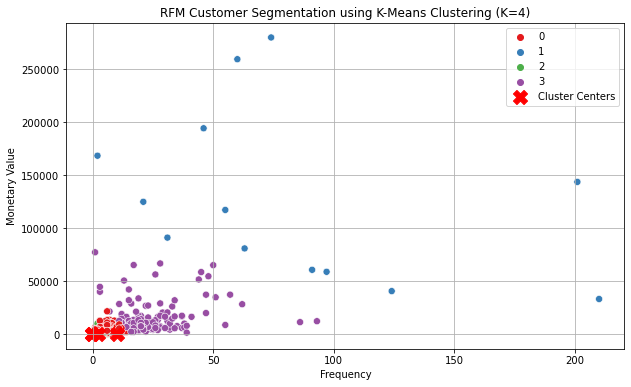

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_data, x='Frequency', y='MonetaryValue', hue='KMeans_Cluster', palette='Set1', s=50)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.title('RFM Customer Segmentation using K-Means Clustering (K=4)')
plt.legend()
plt.grid(True)
plt.show()

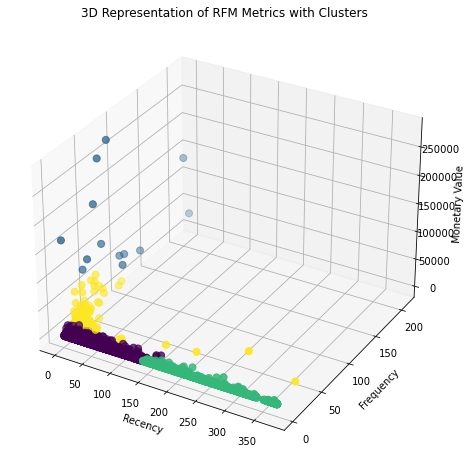

In [88]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['KMeans_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Representation of RFM Metrics with Clusters')
plt.show()

In [89]:
# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
rfm_data['Agg_Cluster'] = agg_clustering.fit_predict(rfm_scaled)

In [90]:
print("\nAgglomerative Hierarchical Clustering:")
print(rfm_data['Agg_Cluster'].value_counts())


Agglomerative Hierarchical Clustering:
3    2804
2    1048
1     472
0      15
Name: Agg_Cluster, dtype: int64


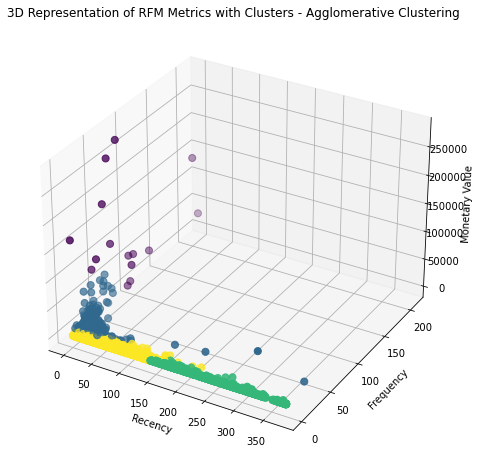

In [91]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['Agg_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Representation of RFM Metrics with Clusters - Agglomerative Clustering')
plt.show()

## 7. Interpretation of Results and Communication

**High-Recency, Low-Frequency, Low-Monetary**

- Customers in this segment do not frequently make purchases, as seen by their high Recency value.
- They also have low Frequency, which means that they don't buy things too often.

- Additionally, their MonetaryValue is low, indicating that they consume less than other categories.
- These individuals can be potential churned or inactive consumers in need of re-engagement tactics.

**High-Recency, High-Frequency, High-Monetary**

- This segment's customers have high Recency, which indicates that their purchases were not recent.
- But , they have high Frequency, which indicates that they shop frequently.
- Furthermore, their MonetaryValue is high, showing that they spend a lot more than other groups do.
- This group is an accurate representation of the best clients, who are also the most lucrative for the company. Through  individualised offers and loyalty programmes, they should be rewarded and kept around.

**Low-Recency, High-Frequency, High-Monetary**
- This segment's customers have low Recency, which means they have recently made purchases.
- They often make purchases as evidenced by their high frequency.
- Additionally, their MonetaryValue is high, indicating they have large expenditures.
- This group is made up of devoted clients who are active buyers and a major source of income for the company. They will -probably respond favourably to loyalty incentives and tailored recommendations.

**Low-Recency, Low-Frequency, Low-Monetary**

- This segment's customers have low Recency, which means they have recently made purchases.
- They do, however, have low Frequency and low Monetary Value, indicating that they spend little money and make few purchases.
- This group may be made up of clients who have recently made purchases but have not shown a high level of involvement or loyalty. For them to spend more money and make purchases more frequently, they might need specific incentives or offers.

